In [1]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import scanpy as sc
import scipy as sp

import sys 
import os
sys.path.append(os.path.abspath("./utility_functions"))

import rz_functions as rz
import ng_functions as ng
import rz_utility_spring as srz

from time import time
from seaborn import heatmap
from scipy import sparse

import scrublet as scr


/home/ng136/miniconda3/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


python version: 3.6.10


In [2]:
cluster_annotation_dict =      {'0' : 'N4',
                                '1' : 'Mono_Trx1',
                                '2' : 'Mac1',
                                '3' : 'DC_CCR7+_CXCL9-',
                                '4' : 'N2',
                                '5' : 'DC_Trx1',
                                '6' : 'Th1',
                              'T5' : 'Th17',
                             'T17' : 'Tnaive',
                             'T31' : 'T8',
                                '7' : 'B_KLF2_hi',
                                '8' : 'EC1',
                                '9' : 'DC_Trx2',
                               '10' : 'KC',
                               '11' : 'NK',
                               '12' : 'KClike_MARCO-',
                               '13' : 'B_KLF2_lo',
                               '14' : 'NKT',
                               '15' : 'N3',
                              #'16' : 'Mono_NT',
                               '17' : 'DC_NT',
                               '18' : 'pDC',
                               '19' : 'Treg',
                               '20' : 'N1',
                               '21' : 'N5',
                               '22' : 'EC2',
                               '23' : 'Mono_Trx2', #placeholder
                               '24' : 'Basophils',
                               '25' : 'B3',
                               '26' : 'RBC',
                               '27' : 'Hepatocytes',
                               'Mono9' : 'Mono_CD11c-',
                                'Mono12' : 'Mono_CD14-',
                               'Myel15' : 'DC_S100A9+',
                               'Myel19' : 'DC_CD83_lo',
                               'Myel22' : 'KClike_MARCO+'}


coarse_annotation_dict =        {'B1' : 'B cells',
                                 'B2' : 'B cells',
                                 'B3' : 'B cells',
                                 'B_KLF2_hi' : 'B cells',
                                 'B_KLF2_lo' : 'B cells',
                                 'Basophils' : 'Basophils',
                                 'DC_CCR7+_CXCL9-' : 'MoMacDC',
                                 'DC_CD83_lo' : 'MoMacDC',
                                 'DC_NT' : 'MoMacDC',
                                 'DC_S100A9+' : 'MoMacDC',
                                 'DC1' : 'MoMacDC',
                                 'DC2' : 'MoMacDC',
                                 'DC3' : 'MoMacDC',
                                 'DC4' : 'MoMacDC',
                                 'DC_Trx1' : 'MoMacDC',
                                 'DC_Trx2' : 'MoMacDC',
                                 'Mac1' : 'MoMacDC',
                                 'Mac2' : 'MoMacDC',
                                 'Mac3' : 'MoMacDC',
                                 'Mac4' : 'MoMacDC',
                                 'CM' : 'MoMacDC',
                                 'iDC' : 'MoMacDC',
                                 'Mono_NT' : 'MoMacDC',
                                 'Mono_Trx1' : 'MoMacDC',
                                 'Mono_Trx2' : 'MoMacDC',
                                 'Mono_CD11c-' : 'MoMacDC',
                                 'Mono_CD14-' : 'MoMacDC',
                                 'MonoDC' : 'MoMacDC',
                                 'KC' : 'MoMacDC',
                                 'KClike_MARCO-' : 'MoMacDC',
                                 'KClike_MARCO+' : 'MoMacDC',
                                 'N1' : 'Neutrophils',
                                 'N2' : 'Neutrophils',
                                 'N3' : 'Neutrophils',
                                 'N4' : 'Neutrophils',
                                 'N5' : 'Neutrophils',
                                 'N6' : 'Neutrophils',
                                 'NK' : 'NK cells',
                                 'NKT' : 'T cells',
                                 'Th1' : 'T cells',
                                 'Th17' : 'T cells',
                                 'Tmix' : 'T cells',
                                 'T8' : 'T cells',
                                 'Tnaive' : 'T cells',
                                 'Treg' : 'T cells',
                                 'pDC' : 'pDC',
                                 'Hepatocytes' : 'Hepatocytes',
                                 'EC1' : 'Endothelial cells',
                                 'EC2' : 'Endothelial cells',
                                 'RBC' : 'Red blood cells'}

# Data loading, preprocessing and normalization

In [3]:
set(cluster_annotation_dict.values()) - set(coarse_annotation_dict.keys())

set()

In [4]:
adata = sc.read_h5ad('backups/tox_marie_all_cells_unnormalized_pca_umap_leiden_35358x22631_backup_200512_04h53.h5ad') #coarse + fine + scrublet

adata[:,['Il12b']].X = adata[:,['Il12b', 'eYFP']].X.sum(1)
adata[:,['eYFP']].X = 0


sc.pp.normalize_total(adata, target_sum=1e4)

adata.obs['n_counts'] = adata.X.sum(1).A1

adata.obs.head()


,barcode,group,library_name,marker,max_mt,min_tot,mito_frac,n_counts,n_genes,pool,tissue,treatment,leiden,leiden2,doublet_score,predicted_doublet
48-pool1,AAACAAACAGAGGATAAGACACCA,B,Liver_CD45pos_NT_B,CD45pos,0.15,200,0.040964,9999.998047,348,pool1,Liver,NT,8,7,0.007103,False
98-pool1,AAACAAACAGAGGATACAATACTT,B,Liver_CD45pos_NT_B,CD45pos,0.15,200,0.005613,10000.000000,581,pool1,Liver,NT,20,32,0.014590,False
237-pool1,AAACAAACAGAGGATAGGCCCTTA,B,Liver_CD45pos_NT_B,CD45pos,0.15,200,0.035451,9999.998047,470,pool1,Liver,NT,11,14,0.016036,False
246-pool1,AAACAAACAGAGGATAGGGAGGTA,B,Liver_CD45pos_NT_B,CD45pos,0.15,200,0.018000,10000.000000,374,pool1,Liver,NT,Mono12,24,0.027342,False
342-pool1,AAACAAACAGAGGATATGGCTACC,B,Liver_CD45pos_NT_B,CD45pos,0.15,200,0.035088,10000.000000,318,pool1,Liver,NT,T17,17,0.007778,False


In [5]:
#loglikelihoods = sp.sparse.load_npz('backups/loglikelihoods_bay_classif_tox_marie_all_cells_200407_11h02.npz')
logls = np.load('backups/loglikelihoods_bay_classif_tox_marie_all_cells_200407_11h02.npz', allow_pickle=True)

mostlikely_subset = pd.DataFrame(logls['data'], index=logls['index'], columns=logls['columns']).idxmax()
mostlikely_subset = pd.Series(mostlikely_subset, dtype='category')
mostlikely_subset.index = adata.obs.index

mostlikely_celltype = mostlikely_subset.map(ng.cell_subset_dict).astype('category')

In [6]:
#adata.obs['cell_type'] = mostlikely_celltype
#adata.obs['minor_subset'] = mostlikely_subset

#annotate color palette in adata.uns
#adata.uns['cell_type_colors'] = adata.obs['cell_type'].cat.categories.map(ng.cell_type_cmap).tolist()
#adata.uns['minor_subset_colors'] = adata.obs['minor_subset'].cat.categories.map(ng.cell_subset_cmap).tolist()

In [7]:
adata = adata[~(adata.obs.predicted_doublet)]
adata = adata[~adata.obs['leiden'].isin(['16', '28','29','30'])]

adata.obs['leiden_minor_subset'] = adata.obs.leiden.map(cluster_annotation_dict).astype('category')
adata.obs['leiden_cell_type'] = adata.obs.leiden_minor_subset.map(coarse_annotation_dict).astype('category')


Trying to set attribute `.obs` of view, copying.


In [12]:
adata_il12b = adata[adata.obs.leiden.isin(['3','5', '9', '12', 'Myel15', 'Myel22', 'Myel19'])]

[<Figure size 1374x400 with 2 Axes>]

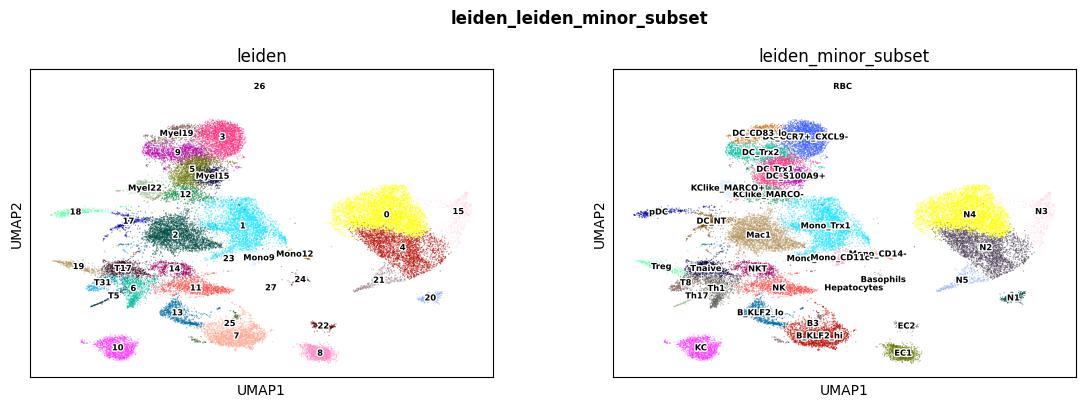

In [14]:
ng.umap_plot(adata, color=['leiden', 'leiden_minor_subset'], return_fig=True, save_fig=False, alpha=0.5)

[<Figure size 1374x400 with 2 Axes>]

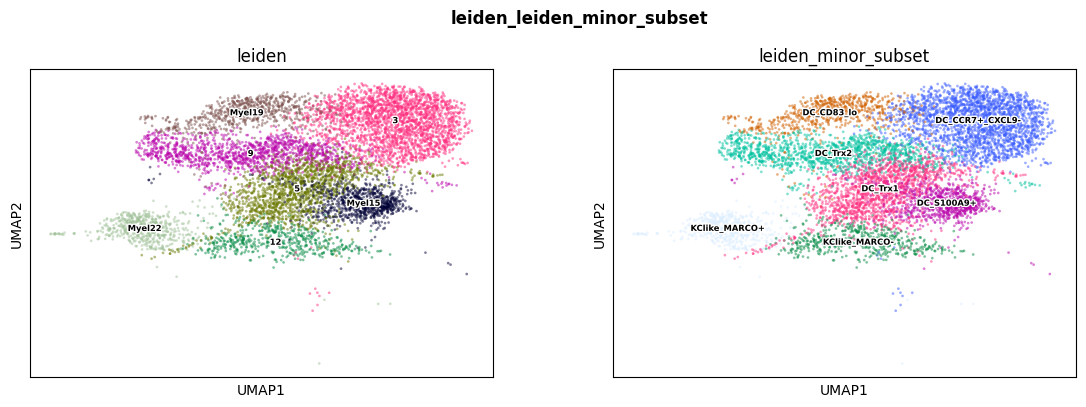

In [15]:
ng.umap_plot(adata_il12b, color=['leiden', 'leiden_minor_subset'], return_fig=True, save_fig=False, alpha=0.5)

# Load reference expression profiles in an AnnData object compatible with scanpy¶

In [16]:
go_df = pd.read_csv('Gal-Oz_NatCommun_2018/GSE122108_Normalized_Gene_count_table.csv', index_col='gene_symbol').T
go_df.index.rename('cell_id', inplace=True)

In [17]:
#go_df.index[70]

In [18]:
go_gene_list = pd.DataFrame(go_df.columns).set_index('gene_symbol')

In [19]:
godata = sc.AnnData(X=go_df.values,
                    obs=go_df.index,
                   var=go_gene_list)

godata.var_names_make_unique()


sc.pp.normalize_per_cell(godata, counts_per_cell_after=1e4)
godata.X = sparse.coo_matrix(godata.X)


print(godata.shape)
godata.obs.head()

(412, 52997)


,cell_id,n_counts
0,MF.64pLYVEpIIn.Ao.1,6760442.0
1,MF.64pLYVEpIIn.Ao.2,7174790.5
2,MF.64pLYVEpIIn.Ao.3,6764147.5
3,MF.64pLYVEpIIp.Ao.1,6989994.0
4,MF.64pLYVEpIIp.Ao.2,7080953.0


In [21]:
godata.obs.cell_id.str.split('.')

godata.obs['Cell_type'] = [i[0] for i in godata.obs.cell_id.str.split('.')]
godata.obs['Metadata'] = ['.'.join(i[1:-2]) for i in godata.obs.cell_id.str.split('.')]
godata.obs['Organ'] = [i[-2] for i in godata.obs.cell_id.str.split('.')]
godata.obs['Batch'] = [i[-1] for i in godata.obs.cell_id.str.split('.')]

In [52]:
#save counts column into a npz df quickly accessible for SPRING

!mkdir -p spring
srz.save_counts_for_spring(godata,'spring/gal-oz_{}'.format(rz.now()), tot_count_column='n_counts')

print(rz.now())

saving for quick loading of genes...
saving for quick loading of cells...
saving as npz...
done
200520_01h50


# Make a SPRING plot using all cells

In [42]:
# out of all cells in adata, select only those you want to plot
# make a copy of the adata object

godata.X = godata.X.tocsc()


cell_mask = np.repeat(True,godata.shape[0])
cdata = godata[cell_mask].copy() # all cells in this case

# chose a name for the spring subplot
plot_name = 'all_cells_w_dblt_corr'

# chose dataset for selecting abundant and variable genes
# here I use linear counts-per-10k

E = cdata.X

# in an attempt to be more organized I keep a log of spring parameter and intermediate data structures used in
# the form of an unstructured annotation as part of an AnnData object.

srz.start_spring_params(cdata,plot_name)

# print the newly created dictionary, also define a variable to access it faster:
pdict = cdata.uns['spring_params'][plot_name]
pdict

{'k': 5,
 'cell_mask': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True

In [43]:
# prepath = 'Gal-Oz_NatCommun_2018/'
# # load count data
# rzdata = sc.read_mtx(prepath+'GSE122108_Normalized_Gene_count_table.csv')

# # load cell annotations
# rzdata.obs = pd.read_csv(prepath+'GSE127465_mouse_cell_metadata_15939x12.tsv.gz',
#             sep='\t',comment='#')

# # load gene names
# rzdata.var_names = np.loadtxt(prepath+'GSE127465_gene_names_mouse_28205.tsv.gz',dtype=str)
# rzdata.var_names_make_unique()

# #normalize immunity paper data to 10,000 counts per cell
# sc.pp.normalize_per_cell(rzdata,counts_per_cell_after=1e4)

# print(rzdata.shape)
# rzdata.obs.head()

In [44]:
# avoid genes starting with
toavoid = ['mt-','Rps','Rpl','Mrpl','Mrps']
# for i in toavoid:
#     print(i)
#     print([g for g in godata.var_names if g.startswith(i)])
#     print()
#     print()

In [45]:
np.array((E>=pdict['min_counts']).sum(axis=0))[0]>=pdict['min_cells']

array([False, False, False, ...,  True, False, False])

In [46]:

cell_mask = np.repeat(True,godata.shape[0])


pdict = dict()


pdict['cell_mask'] = cell_mask # record which cell out of all were used

pdict['k'] = 10

pdict['min_counts'] = 10
pdict['min_cells'] = 5


E = godata.X

# genes to exclude:


exclude_gene_names = []
for j in toavoid:
    exclude_gene_names.append([i for i in godata.var_names if i.startswith(j)])
exclude_gene_names = rz.flatten_list_of_lists(exclude_gene_names)

pdict['gene_names_excluded'] = exclude_gene_names
print('%d genes excluded based on name'%len(exclude_gene_names))


##########################################################################################

# filter on abundance:
pdict['abundant_gene_mask'] = srz.filter_abund_genes(
                                                     E,
                                                     pdict['min_counts'],
                                                     pdict['min_cells']
                                                    )

509 genes excluded based on name
557 genes passing abundance filter


In [47]:
# combine gene filters so far
undesired = list(pdict['gene_names_excluded'])+\
            list(cdata.var_names[~pdict['abundant_gene_mask']])

print(len(undesired))
undesired = list(set(undesired))
print(len(undesired))

# boolean mask
combmask = ~np.in1d(cdata.var_names,undesired)
print(combmask.sum(),'surviving genes so far')

52949
52457
540 surviving genes so far


In [48]:
# calculate v score (Klein et al., 2015, see equation S4 and S13) for all non-zero genes
isexpr = np.array(E.sum(axis=0))[0]>0
print('%d genes with non-zero expression'%sum(isexpr))
pdict['v_score_dict'] = srz.vscores(E[:,isexpr])

52997 genes with non-zero expression


In [49]:
# get genes above mode, i.e. any that can be considered variable
gabmod = cdata.var_names[isexpr][pdict['v_score_dict']['var_gene_mask']]
print(len(gabmod),'variable genes')

52997 variable genes


In [50]:
# update combmask:
mvar = np.in1d(cdata.var_names,gabmod)
print(mvar.sum())
combmask = combmask&mvar
print(combmask.sum(),'abundant and variable genes')

52997
540 abundant and variable genes


In [51]:
# if filtering on correlation, get gene-gene correlation (quite slow)
corx = E[:,combmask]
print(corx.shape)
corx = srz.sparse_corrcoef(corx.T)
corx = np.array(corx)

(412, 540)
0.01 min.


In [52]:
# select correlation filters (largely arbitrary), as described in Klein et al. 2015
genes_at_least = 3 #at least this number of genes correlated to any other gene
corr_at_least = 0.15 #with a Pearson correlation coefficient at least this large

################################################################################

# genes passing correlation filter
cormask = (abs(corx)>corr_at_least).sum(axis=0)>genes_at_least #"more than" as one instance is the gene itself with r=1
print((~cormask).sum(), 'genes to exclude based on correlation')

# combine filter
pdict['genes_used'] = cdata.var_names[combmask][cormask]
print(len(pdict['genes_used']),'genes surviving all filters')

0 genes to exclude based on correlation
540 genes surviving all filters


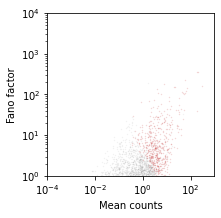

In [53]:
# plot a fano factor vs mean plot with genes used further colored in red
ff = pdict['v_score_dict']['ff_gene']
mu = pdict['v_score_dict']['mu_gene']
finalmask = np.in1d(cdata.var_names,pdict['genes_used'])

# check scatter
s = 2
plt.figure(figsize=(3,3))
plt.scatter(mu,ff,lw=0,color='0.5',alpha=0.1,s=s)
plt.scatter(mu[finalmask[isexpr]],ff[finalmask[isexpr]],lw=0,color='r',alpha=0.1,s=s)
plt.xscale('log');
plt.yscale('log');
plt.xlim(0.0001,1000)
plt.ylim(1,10000)
plt.xlabel('Mean counts')
plt.ylabel('Fano factor');

# Prepare data for PCA

In [54]:
# leave only genes defined as variable, overwrite
print(cdata.shape)
finalmask = np.in1d(cdata.var_names,pdict['genes_used'])
cdata = cdata[:,finalmask]
print(cdata.shape)

(412, 52997)
(412, 540)


In [55]:
sc.pp.scale(cdata)
Z = cdata.X

/home/ng136/miniconda3/envs/py36/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:912: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


# PCA using automatically computed number of components. Skip to next block for manually computed number of PCs.

In [56]:
# find the number of non-random PCs. Shuffling 3 times would be enough here for the initial plot.
d = srz.find_num_pc(Z,start_pc=500,sparse=False,n=5)

calculating the first 411 observed eigenvalues...
calculating the random eigenvalues for 5 rounds of shuffling...
1 	 20 	 0.01 min.
2 	 20 	 0.01 min.
3 	 20 	 0.02 min.
4 	 20 	 0.02 min.
5 	 20 	 0.02 min.


### Run PCA on the z-scored data


In [57]:
start = time()

#here's where one could adjust the number of PCs to set it automatically from the previous cell
sc.tl.pca(cdata, svd_solver='arpack', n_comps = d['num_pc'],) 

print(time() - start)

0.010752201080322266


# Compute neighbors map of cells, necessary for UMAP

In [58]:
sc.pp.neighbors(cdata, n_neighbors=10, use_rep='X_pca')

In [59]:
sc.tl.umap(cdata)

# Classifier

# GO cluster characterization

In [11]:
cat0 = rz.centroids('leiden_minor_subset', adata).T
cat0.head()

,EC1,N1,NK,Mono_CD14-,Tnaive,DC_CCR7+_CXCL9-,N4,Th1,B_KLF2_hi,KC,...,B3,KClike_MARCO-,T8,Hepatocytes,DC_Trx1,Basophils,DC_CD83_lo,RBC,Mono_Trx2,DC_Trx2
Xkr4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.332447,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Rp1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Sox17,0.842714,0.000000,0.000000,0.000000,0.000000,0.000000,0.003524,0.020247,0.000000,0.000000,...,0.000000,0.000000,0.054299,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Mrpl15,0.405819,0.000000,0.338068,0.324636,0.766301,0.574795,0.055832,0.457622,0.584114,0.245774,...,1.552626,0.365676,0.638389,3.280503,0.498485,0.367278,0.495037,0.0,0.308471,0.310509
Lypla1,0.702126,0.250964,0.661918,0.582624,0.471754,0.533167,0.301729,0.663823,0.362715,0.351326,...,0.934806,0.603201,0.761356,0.679124,0.617957,0.891293,0.764077,0.0,2.336199,0.468392


In [12]:
pseudo = 0.1
cat = cat0 + pseudo

# Find common genes between the two datasets.
 Filtering on variable genes is also a possibility but I start by simply using all genes

In [ ]:
Eraw = godata.X
print(type(Eraw))

gene_list = godata.var_names

In [ ]:
# common genes
gmask = np.in1d(gene_list, cat.index)

# genes detected in the current dataset:
m2 = np.array(Eraw.sum(axis=0))[0]>0

# combine masks
gmask = gmask&m2


common_genes = gene_list[gmask]
print(len(gene_list),len(cat.index),len(common_genes))

In [ ]:
print(Eraw.shape)

In [101]:
start = time()
bays = []
i = 0
step=5000
comment = 'gal-oz_classified_on_ng_clusters'
for j in range(step,Eraw.shape[0]+step,step):
    
    # Eraw - sparse cells x gene matrix
    j = min(j,Eraw.shape[0])
    tmp_dense = pd.DataFrame(Eraw.T[gmask][:,i:j])#.todense())
    tmp_dense.index = np.array(gene_list)[gmask]
    
    bay = rz.bayesian_classifier(tmp_dense,cat.loc[common_genes])
    bays.append(bay)
    i0 = i
    i = j
    
    print('%.2f min.'%((time()-start)/60.))
    print('cells from %d to %d done'%(i0,j))

# conenate
bay = pd.concat(bays,axis=1)

# reset index
bay.columns = np.arange(bay.shape[1])

fname = 'backups/loglikelihoods_bay_classif_%s_%s'%(comment,rz.now())
print(fname)
rz.save_df(bay,fname)

0.22 min.
cells from 0 to 412 done
backups/loglikelihoods_bay_classif_gal-oz_classified_on_ng_clusters_200519_01h40


# GO cluster characterization (by only IL12b+ groups)

In [22]:
cat0 = rz.centroids('leiden_minor_subset', adata_il12b).T
cat0.head()

,DC_CCR7+_CXCL9-,KClike_MARCO+,DC_S100A9+,KClike_MARCO-,DC_Trx1,DC_CD83_lo,DC_Trx2
Xkr4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rp1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sox17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mrpl15,0.574795,0.271996,0.477275,0.365676,0.498485,0.495037,0.310509
Lypla1,0.533167,0.550605,0.819667,0.603201,0.617957,0.764077,0.468392


In [23]:
pseudo = 0.1
cat = cat0 + pseudo

# Find common genes between the two datasets.
 Filtering on variable genes is also a possibility but I start by simply using all genes

In [24]:
Eraw = godata.X
print(type(Eraw))

gene_list = godata.var_names

<class 'scipy.sparse.coo.coo_matrix'>


In [25]:
# common genes
gmask = np.in1d(gene_list, cat.index)

# genes detected in the current dataset:
m2 = np.array(Eraw.sum(axis=0))[0]>0

# combine masks
gmask = gmask&m2


common_genes = gene_list[gmask]
print(len(gene_list),len(cat.index),len(common_genes))

52997 22631 22000


In [37]:
print(Eraw.shape)

(412, 52997)


In [39]:
Eraw.T.todense()[gmask]

matrix([[0.16318144, 0.16266184, 0.10573571, ..., 0.13699389, 0.13424978,
         0.14038433],
        [0.21473868, 0.19457947, 0.21703747, ..., 0.2964732 , 0.37994787,
         0.36993217],
        [0.00850973, 0.02995165, 0.02965604, ..., 0.01244811, 0.01299619,
         0.01109875],
        ...,
        [1.2833797 , 0.9421241 , 1.0665938 , ..., 1.8821535 , 1.986558  ,
         2.2947042 ],
        [0.57329583, 0.52551496, 0.5748937 , ..., 0.8478161 , 1.1441646 ,
         0.91477853],
        [0.23348676, 0.19625933, 0.21281083, ..., 0.3374822 , 0.33846638,
         0.43721345]], dtype=float32)

In [40]:
start = time()
bays = []
i = 0
step=5000
comment = 'gal-oz_classified_on_ng_il12b_clusters'
for j in range(step,Eraw.shape[0]+step,step):
    
    # Eraw - sparse cells x gene matrix
    j = min(j,Eraw.shape[0])
    tmp_dense = pd.DataFrame(Eraw.T.todense()[gmask][:,i:j])#.todense())
    tmp_dense.index = np.array(gene_list)[gmask]
    
    bay = rz.bayesian_classifier(tmp_dense,cat.loc[common_genes])
    bays.append(bay)
    i0 = i
    i = j
    
    print('%.2f min.'%((time()-start)/60.))
    print('cells from %d to %d done'%(i0,j))

# conenate
bay = pd.concat(bays,axis=1)

# reset index
bay.columns = np.arange(bay.shape[1])

fname = 'backups/loglikelihoods_bay_classif_%s_%s'%(comment,rz.now())
print(fname)
rz.save_df(bay,fname)

0.06 min.
cells from 0 to 412 done
backups/loglikelihoods_bay_classif_gal-oz_classified_on_ng_il12b_clusters_200520_23h56


# Remember to update the NPZ file in the line below!!!! ⚠️

# Load classifier log-likelihoods, distinguish from Lung --> Tox

In [60]:
logls_galoz = np.load('backups/loglikelihoods_bay_classif_gal-oz_classified_on_ng_clusters_200519_01h40.npz', allow_pickle=True)

mostlikely_subset_galoz = pd.DataFrame(logls_galoz['data'], index=logls_galoz['index'], columns=logls_galoz['columns']).idxmax()
mostlikely_subset_galoz = pd.Series(mostlikely_subset_galoz, dtype='category')
mostlikely_subset_galoz.index = godata.obs.index

mostlikely_celltype_galoz = mostlikely_subset_galoz.map(coarse_annotation_dict).astype('category')

godata.obs['leiden_cell_type'] = mostlikely_celltype_galoz
godata.obs['leiden_minor_subset'] = mostlikely_subset_galoz
cdata.obs['leiden_cell_type'] = mostlikely_celltype_galoz
cdata.obs['leiden_minor_subset'] = mostlikely_subset_galoz

In [61]:
logls_galoz_il12b = np.load('backups/loglikelihoods_bay_classif_gal-oz_classified_on_ng_il12b_clusters_200520_23h56.npz', allow_pickle=True)

mostlikely_subset_galoz_il12b = pd.DataFrame(logls_galoz_il12b['data'], index=logls_galoz_il12b['index'], columns=logls_galoz_il12b['columns']).idxmax()
mostlikely_subset_galoz_il12b = pd.Series(mostlikely_subset_galoz_il12b, dtype='category')
mostlikely_subset_galoz_il12b.index = godata.obs.index

mostlikely_celltype_galoz_il12b = mostlikely_subset_galoz_il12b.map(coarse_annotation_dict).astype('category')

godata.obs['leiden_cell_type_il12b'] = mostlikely_celltype_galoz_il12b
godata.obs['leiden_minor_subset_il12b'] = mostlikely_subset_galoz_il12b
cdata.obs['leiden_cell_type_il12b'] = mostlikely_celltype_galoz_il12b
cdata.obs['leiden_minor_subset_il12b'] = mostlikely_subset_galoz_il12b

In [74]:
cdata.obs['KC'] = cdata.obs.Metadata.str.contains('KC')#.astype('category')
cdata.obs['pDC'] = cdata.obs.Metadata.str.contains('pDC')#.astype('category')
cdata.obs['cDC1'] = cdata.obs.Metadata.str.contains('cDC1')#.astype('category')
cdata.obs['cDC2'] = cdata.obs.Metadata.str.contains('cDC2')#.astype('category')

In [63]:
#cdata.obs.Metadata.str.contains

In [112]:
godata.obs.leiden_cell_type.cat.categories

#np.where(rzdata.obs.leiden_minor_subset.map(coarse_annotation_dict).astype('category').isna())
#rzdata.obs.iloc[[ 305, 4746, 9669, 9820, 9842, 9863],:]

Index(['B cells', 'Endothelial cells', 'MoMacDC', 'pDC'], dtype='object')

In [70]:
cdata.obs[(cdata.obs.Organ == 'Lv')].loc[:,['cell_id', 'Cell_type', 'Organ', 'leiden_minor_subset', 'leiden_minor_subset_il12b']]

,cell_id,Cell_type,Organ,leiden_minor_subset,leiden_minor_subset_il12b
127,MF.64p6Cn6Gn.E18.5.Lv.1,MF,Lv,KC,KClike_MARCO+
128,MF.64p6Cn6Gn.E18.5.Lv.2,MF,Lv,KC,KClike_MARCO+
152,DC.cDC1.XCR1p.Lv.1,DC,Lv,DC_NT,KClike_MARCO-
153,DC.cDC1.XCR1p.Lv.2,DC,Lv,DC_NT,KClike_MARCO-
154,DC.cDC1.XCR1p.Lv.3,DC,Lv,DC_NT,KClike_MARCO-
155,DC.cDC2.172ap.Lv.1,DC,Lv,DC_NT,KClike_MARCO-
156,DC.cDC2.172ap.Lv.2,DC,Lv,DC_NT,KClike_MARCO-
157,DC.cDC2.172ap.Lv.3,DC,Lv,DC_NT,KClike_MARCO-
158,DC.cDC2.172ap.Lv.4,DC,Lv,DC_NT,KClike_MARCO-
159,DC.pDC.120g8p11cintp6Cp.Lv.1,DC,Lv,pDC,DC_S100A9+


Trying to set attribute `.obs` of view, copying.
... storing 'Cell_type' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Metadata' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Organ' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Batch' as categorical


[<Figure size 6870x8000 with 12 Axes>]

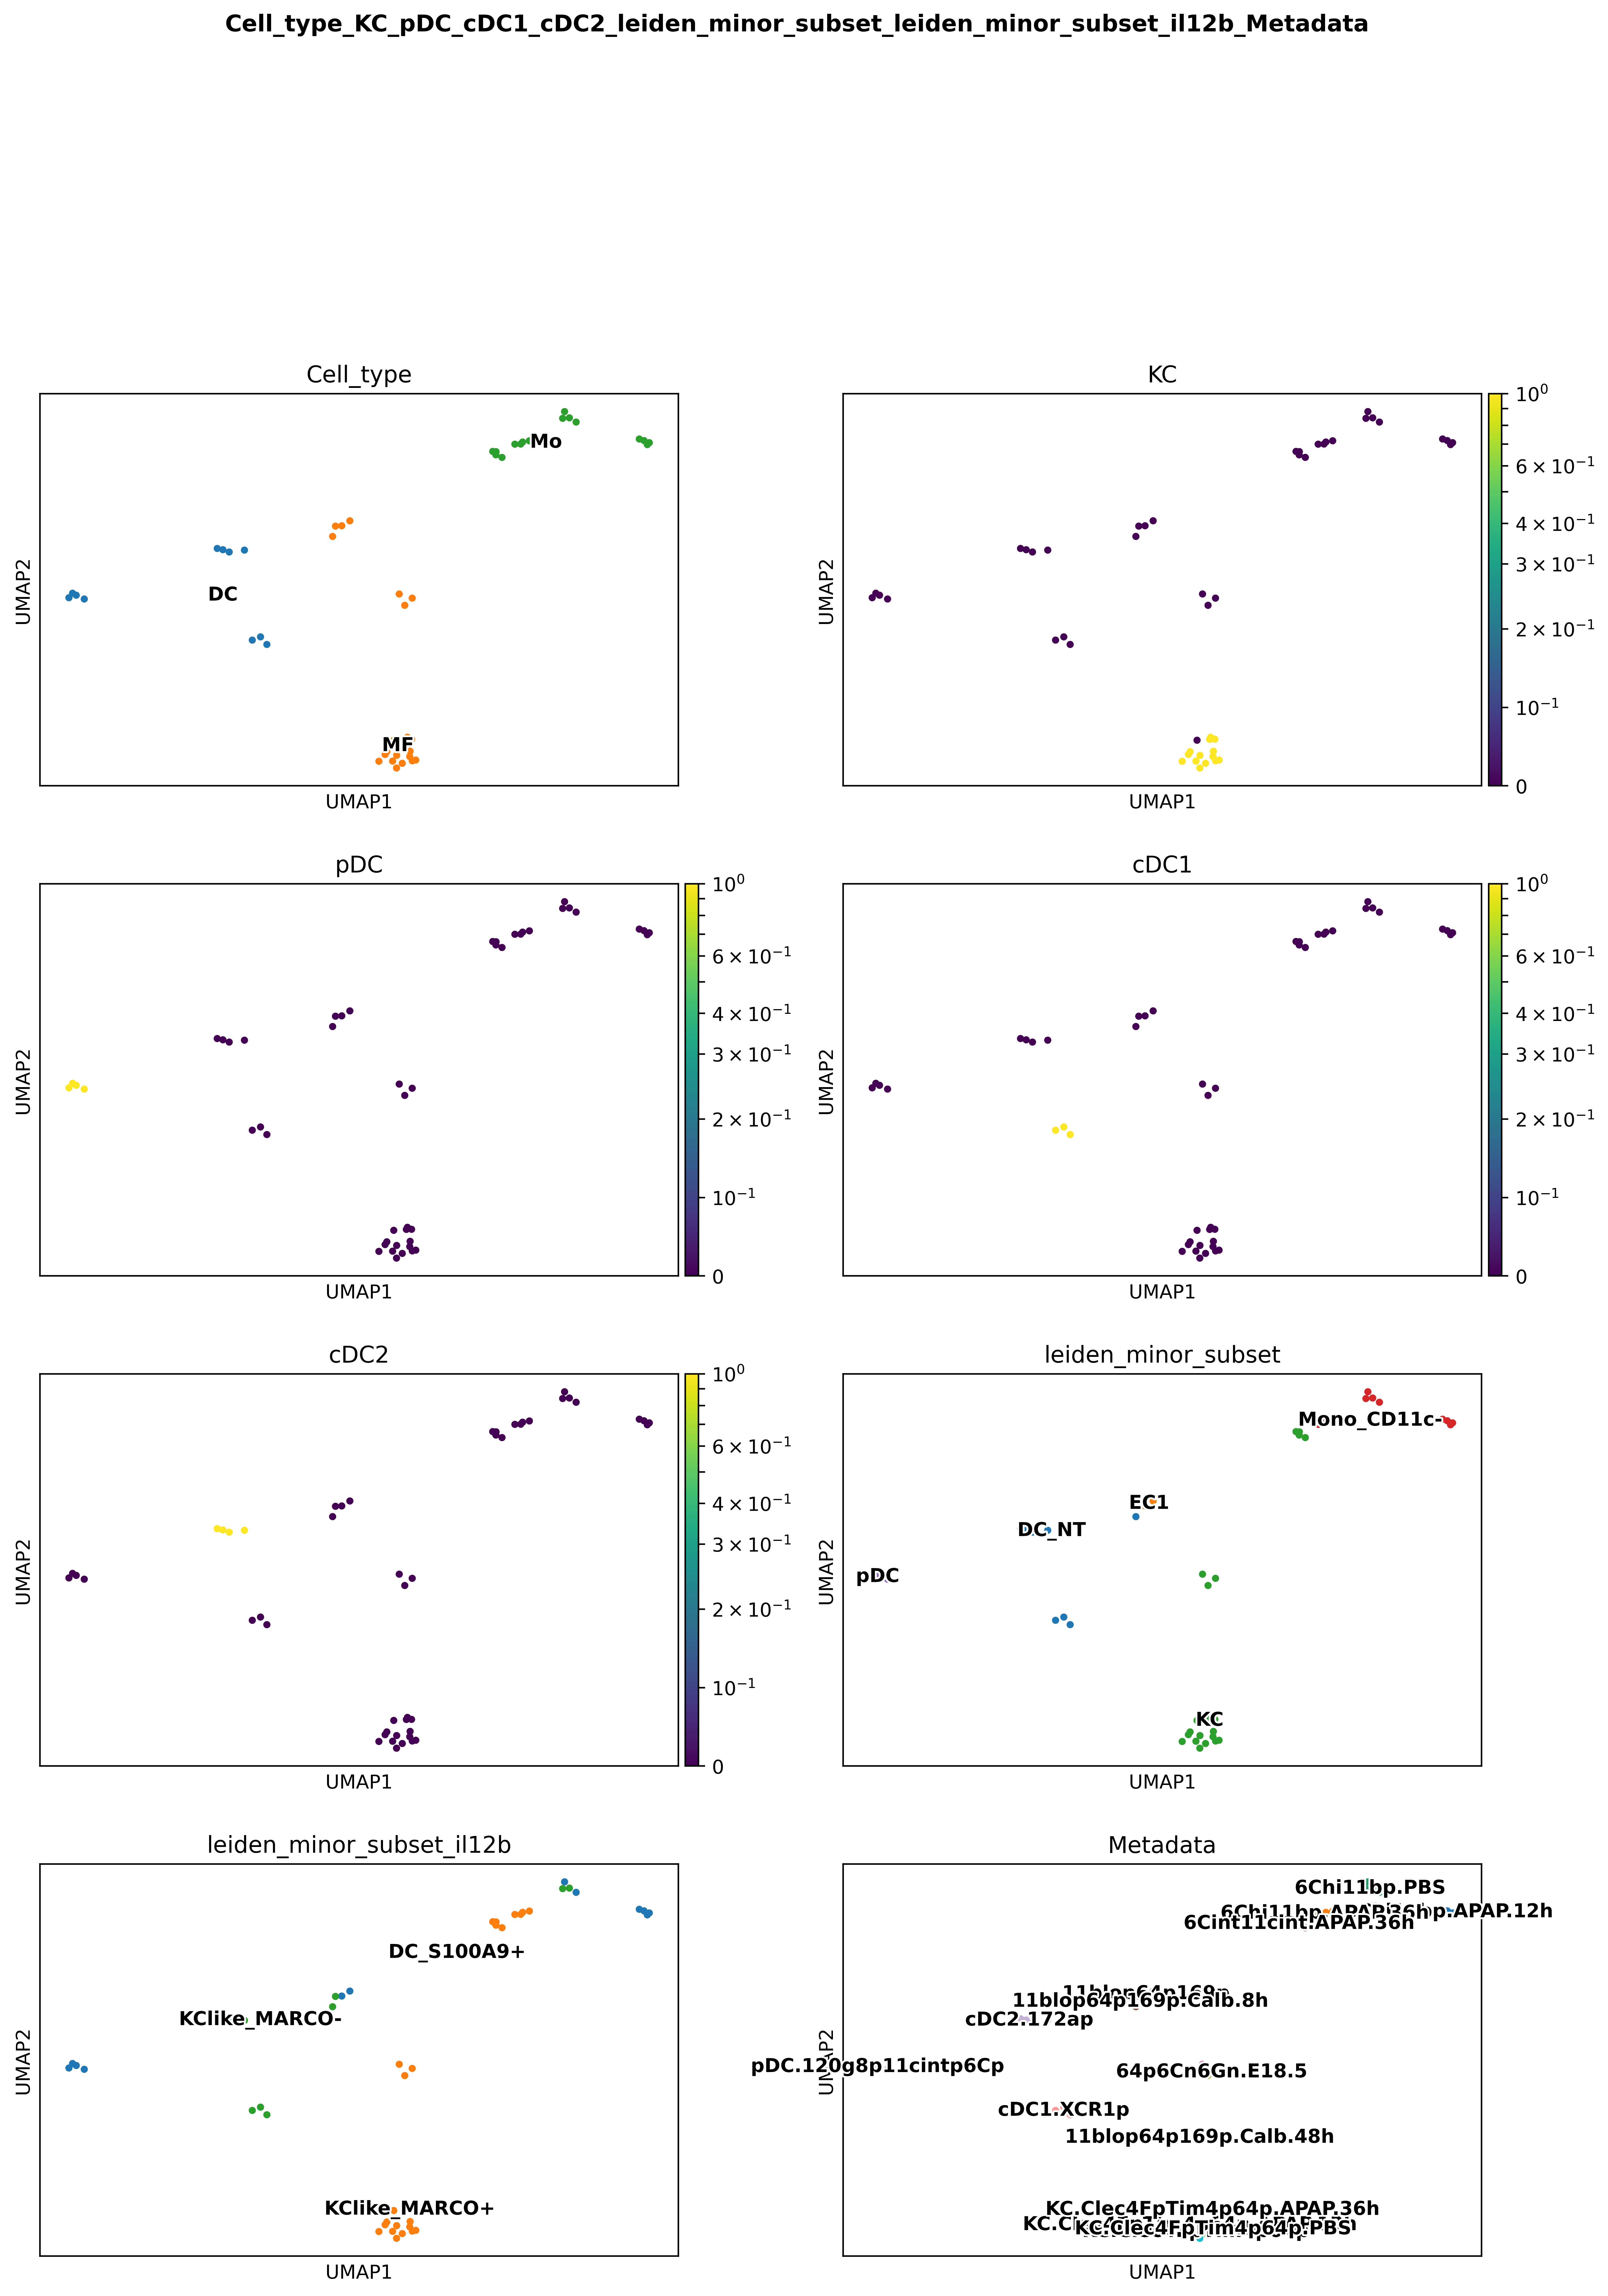

In [75]:
ng.umap_plot(cdata, color=['Cell_type', 'KC','pDC', 'cDC1', 'cDC2', 'leiden_minor_subset', 'leiden_minor_subset_il12b', 'Metadata'], filt='Organ == "Lv"', dpi_show=500, legend_fontsize=10, size=56, ncols=2)

In [80]:
godata

AnnData object with n_obs × n_vars = 412 × 52997 
    obs: 'n_counts', 'leiden_cell_type', 'leiden_minor_subset'

In [83]:
go_df.index

Index(['MF.64pLYVEpIIn.Ao.1', 'MF.64pLYVEpIIn.Ao.2', 'MF.64pLYVEpIIn.Ao.3',
       'MF.64pLYVEpIIp.Ao.1', 'MF.64pLYVEpIIp.Ao.2', 'MF.64pLYVEpIIp.Ao.3',
       'MF.64pLYVEnIIp.Ao.1', 'MF.64pLYVEnIIp.Ao.2', 'MF.64pLYVEnIIp.Ao.3',
       'MF.PC.44',
       ...
       'MF.B220n6Cn64pTim4p.PC.2', 'MF.B220n6Cn64pTim4p.PC.3',
       'MF.B220n6Cn64pTim4p.PC.4', 'MF.B220n6Cn64pTim4p.PC.5',
       'MF.B220n6Cn64pTim4p.PC.6', 'MF.PC.11', 'MF.PC.12', 'MF.PC.13',
       'MF.PC.14', 'MF.PC.15'],
      dtype='object', name='cell_id', length=412)

# Major cell type level

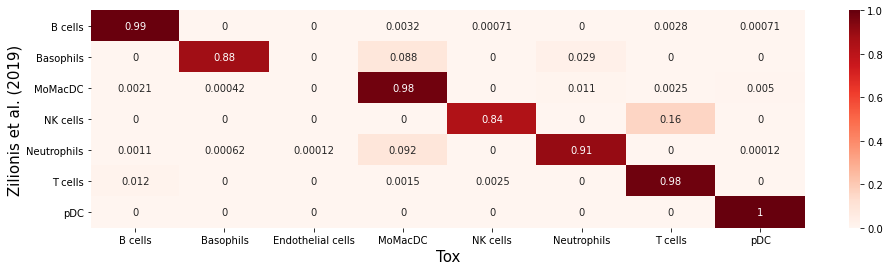

In [37]:
rz_to_tox_cell_type = rzdata.obs.groupby(['Major cell type', 'leiden_cell_type']).size().groupby(level=0).apply(lambda x : x/sum(x)).reset_index(name='fraction').pivot(index='Major cell type', columns='leiden_cell_type')
rz_to_tox_cell_type.columns = rz_to_tox_cell_type.columns.get_level_values('leiden_cell_type')


plt.figure(figsize=(16,4))
heatmap(rz_to_tox_cell_type, annot=True, cmap='Reds')

plt.ylabel('Zilionis et al. (2019)', fontsize=15)
plt.xlabel('Tox', fontsize=15)
#plt.xticks(rotation=45)


plt.show()

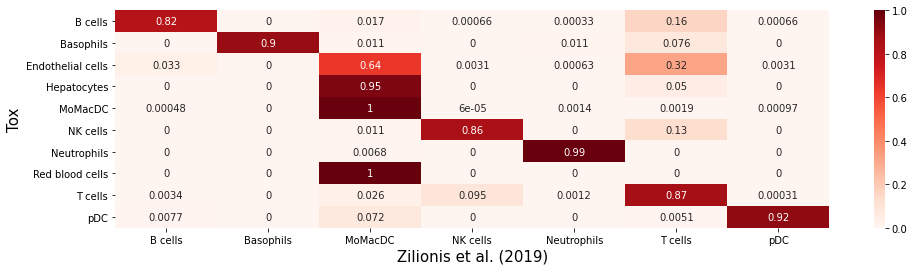

In [38]:
tox_to_rz_cell_type = adata.obs.groupby(['leiden_cell_type', 'cell_type']).size().groupby(level=0).apply(lambda x : x/sum(x)).reset_index(name='fraction').pivot(columns='leiden_cell_type', index='cell_type')
tox_to_rz_cell_type.columns = tox_to_rz_cell_type.columns.get_level_values('leiden_cell_type')


plt.figure(figsize=(16,4))

#transpose to keep direction of axes and still make it multiplicable
heatmap(tox_to_rz_cell_type.transpose(), annot=True, cmap='Reds')

plt.xlabel('Zilionis et al. (2019)', fontsize=15)
plt.ylabel('Tox', fontsize=15)

plt.show()

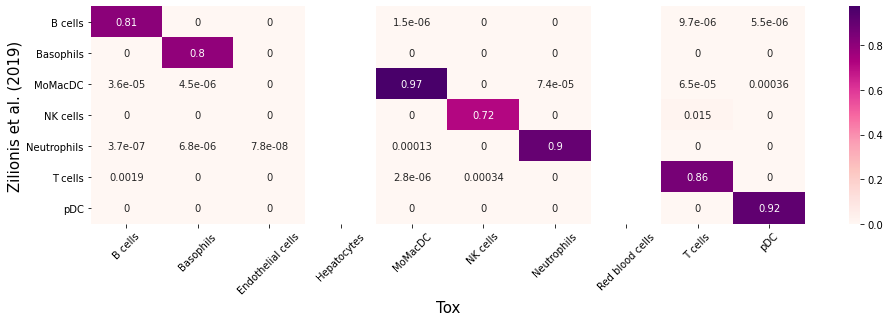

In [39]:
reciprocal_cell_type = rz_to_tox_cell_type * tox_to_rz_cell_type

plt.figure(figsize=(16,4))
heatmap(reciprocal_cell_type, annot=True, cmap='RdPu')

plt.ylabel('Zilionis et al. (2019)', fontsize=15)
plt.xlabel('Tox', fontsize=15)
plt.xticks(rotation=45)

plt.show()

# Minor subset level

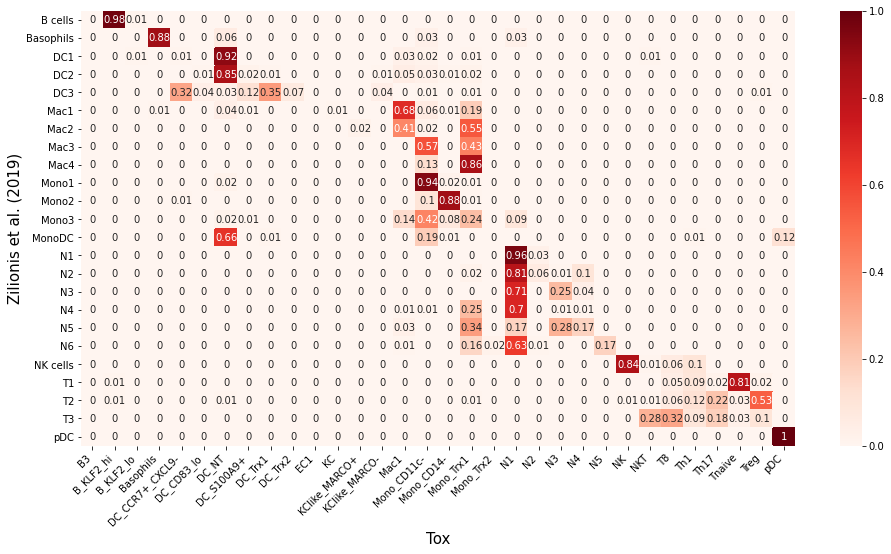

In [40]:
rz_to_tox_subset = rzdata.obs.groupby(['Minor subset', 'leiden_minor_subset']).size().groupby(level=0).apply(lambda x : x/sum(x)).reset_index(name='fraction').pivot(index='Minor subset', columns='leiden_minor_subset')
rz_to_tox_subset.columns = rz_to_tox_subset.columns.get_level_values('leiden_minor_subset')

plt.figure(figsize=(16,8))
heatmap(round(rz_to_tox_subset,2), annot=True, cmap='Reds')

plt.ylabel('Zilionis et al. (2019)', fontsize=15)
plt.xlabel('Tox', fontsize=15)
plt.xticks(rotation=45, horizontalalignment="right")

plt.show()

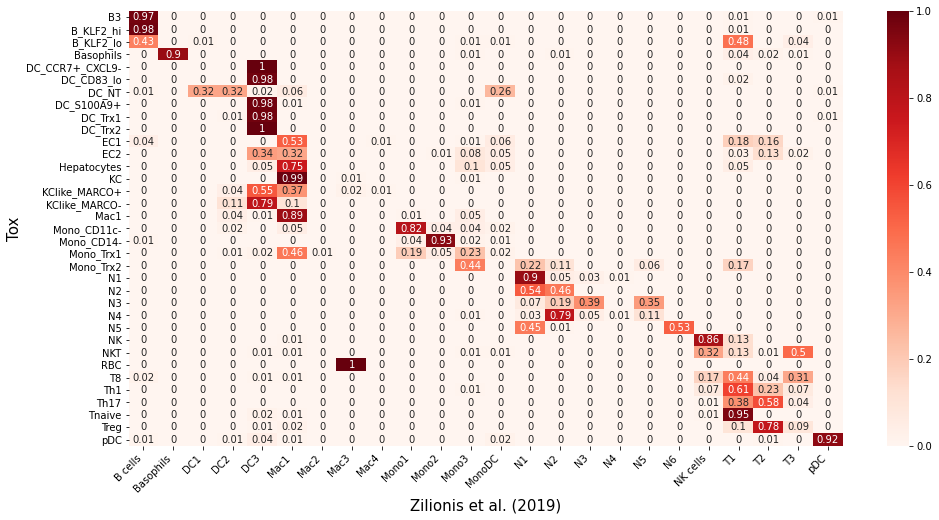

In [44]:
tox_to_rz_subset = adata.obs.groupby(['leiden_minor_subset', 'minor_subset']).size().groupby(level=0).apply(lambda x : x/sum(x)).reset_index(name='fraction').pivot(columns='leiden_minor_subset', index='minor_subset')
tox_to_rz_subset.columns = tox_to_rz_subset.columns.get_level_values('leiden_minor_subset')
tox_to_rz_subset = tox_to_rz_subset[sorted(tox_to_rz_subset)]


#tox_to_rz_subset.index.get_level_values('leiden_minor_subset')
plt.figure(figsize=(16,8))
heatmap(round(tox_to_rz_subset.transpose(),2), annot=True, cmap='Reds')

plt.xlabel('Zilionis et al. (2019)', fontsize=15)
plt.ylabel('Tox', fontsize=15)
plt.xticks(rotation=45, horizontalalignment="right")


plt.show()

#round(tox_to_rz_subset.transpose(),2).index.get_level_values('leiden_minor_subset')

In [45]:
tox_to_rz_subset.columns

CategoricalIndex(['B3', 'B_KLF2_hi', 'B_KLF2_lo', 'Basophils',
                  'DC_CCR7+_CXCL9-', 'DC_CD83_lo', 'DC_NT', 'DC_S100A9+',
                  'DC_Trx1', 'DC_Trx2', 'EC1', 'EC2', 'Hepatocytes', 'KC',
                  'KClike_MARCO+', 'KClike_MARCO-', 'Mac1', 'Mono_CD11c-',
                  'Mono_CD14-', 'Mono_Trx1', 'Mono_Trx2', 'N1', 'N2', 'N3',
                  'N4', 'N5', 'NK', 'NKT', 'RBC', 'T8', 'Th1', 'Th17',
                  'Tnaive', 'Treg', 'pDC'],
                 categories=['N4', 'Mono_Trx1', 'KC', 'NK', 'KClike_MARCO-', 'B_KLF2_lo', 'NKT', 'N3', ...], ordered=False, name='leiden_minor_subset', dtype='category')

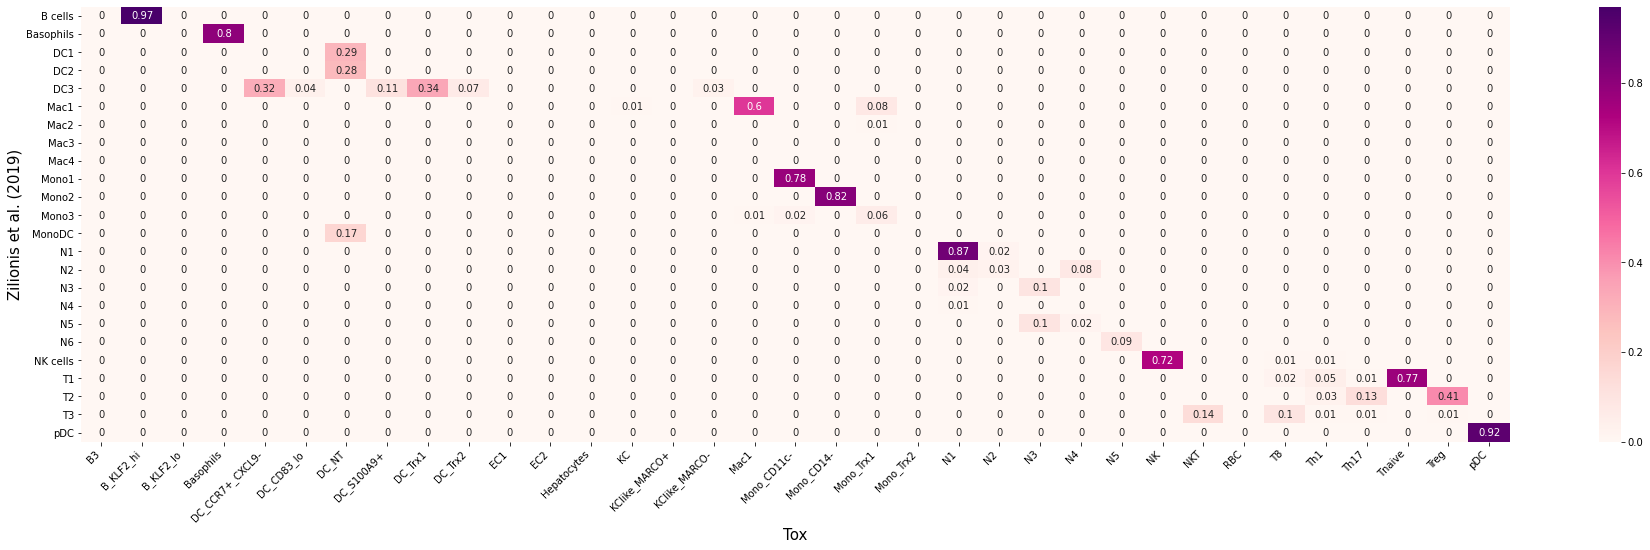

In [46]:
reciprocal_subset = rz_to_tox_subset * tox_to_rz_subset

plt.figure(figsize=(32,8))
heatmap(round(reciprocal_subset.fillna(0),2), annot=True, cmap='RdPu')

plt.ylabel('Zilionis et al. (2019)', fontsize=15)
plt.xlabel('Tox', fontsize=15)
plt.xticks(rotation=45, ha='right')
#plt.gca().xaxis.set_tick_params(ha='left')

plt.show()
